In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display


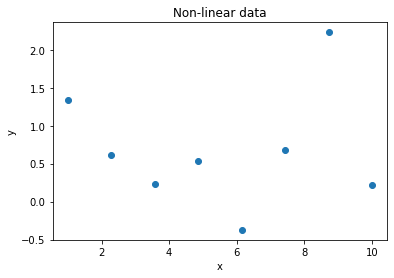

In [2]:
# Generate N number of points from _FROM to _TO
_FROM, _TO, N = 1, 10, 8

x = np.linspace(_FROM, _TO+1e-3, N)

# Add random seed for reproducibility
np.random.seed(42)

# Get output from sin function with added noise
y = np.sin(x) + np.random.normal(scale=1, size=x.shape[0])

X = x.reshape((-1, 1))

# Visualize the generated data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear data')
plt.show()


In [3]:
def visualize_model(model, title=None, tr=None):
    _x = np.linspace(_FROM - 1e-1, _TO + 1e-2, 200)
    _xr = _x.reshape(-1, 1)
    if tr:
        _xr = tr.transform(_xr)

    _y = model.predict(_xr)

    # print(y.shape)
    plt.plot(_x, _y, color='green')
    plt.scatter(x, y, color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    if title:
        plt.title(title)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[]

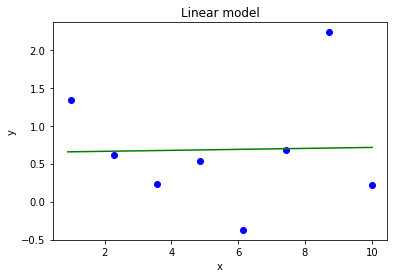

In [4]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X, y)

visualize_model(linear, title='Linear model')

plt.plot()


In [5]:
# Import PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures

# DEGREE FROM _FROM_DEGREE TO _TO_DEGREE WITH _DEGREE_STEP STEP VALUE
_FROM_DEGREE, _TO_DEGREE, _DEGREE_STEP = 1, 8, 1

# Create a range of degree of polynomial equation
degrees = range(_FROM_DEGREE, _TO_DEGREE+1, _DEGREE_STEP)

ncols = 3
nrows = int(np.ceil(len(degrees)/ncols))

# plt.figure(figsize=(12, 16))

models = []

for degree in degrees:
    # Transform the feature
    poly_feature = PolynomialFeatures(degree=degree)

    X_tr = poly_feature.fit_transform(X)
    # Using same linear regression model
    linear_model = LinearRegression()

    # Fit model wit transformed feature
    linear_model.fit(X_tr, y)

    models.append([degree, linear_model, poly_feature])

In [9]:
#@title Visualization code (utils.py)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display


def animate_figure(x,y,models,_FROM,_TO):

  # For animation

  # fig, ax = plt.subplots()
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(1, 1, 1)

  ax.set_ylim(-0.5, 2.5)
  # ax.set_xlim()
  print(x.shape, y.shape)
  ax.scatter(x, y, c='blue')

  x_data = np.linspace(_FROM - 1e-1, _TO + 1e-2, 200)
  x_in = x_data.reshape(-1, 1)

  line,  = ax.plot(x_data, x_data, c='green')

  line.set_xdata(x_data)

  def anim_init():
      line.set_ydata([np.nan] * len(x_data))
      return line, 

  def animate_fn(a):
      deg, model, tr = models[a]
      x_dt = tr.transform(x_in)

      _y = model.predict(x_dt)
      line.set_ydata(_y)

      ax.set_title(f'Model with degree: {deg}')

      return line, 

  anim = animation.FuncAnimation(fig, animate_fn, frames=len(models), interval=2000, blit=True)

  video = anim.to_html5_video()
  html = display.HTML(video)
  display.clear_output(wait=True)
  display.display(html)

  plt.close()

(8,) (8,)


RuntimeError: Requested MovieWriter (ffmpeg) not available

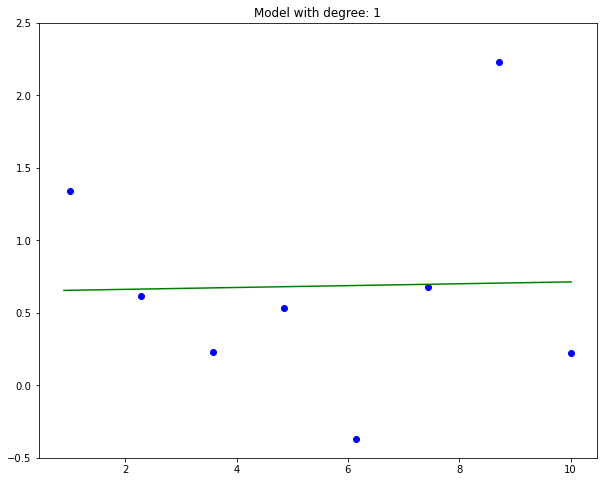

In [10]:
# Import file containing code of animation
# from utils import animate_figure

# Call function to create animation
animate_figure(x,y,models,_FROM,_TO)
